Answer all questions and submit them either as an IPython notebook, LaTeX document, or Markdown document. Provide full answers for each question, including interpretation of the results. Each question is worth 25 points.

This homework is due on Friday, December 8, 2017.

## Question 1

The `titanic.xls` spreadsheet in the `data` directory contains data regarding the passengers on the Titanic when it sank in 1912. A recent [Kaggle competition](http://www.kaggle.com/c/titanic-gettingStarted) was based on predicting survival for passengers based on the attributes in the passenger list. 

Use scikit-learn to build both a support vector classifier and a logistic regression model to predict survival on the Titanic. Use cross-validation to assess your models, and try to tune them to improve performance.

Discuss the benefits and drawbacks of both approaches for application to such problems.

In [78]:
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, make_scorer

titanic = pd.read_excel("../data/titanic.xls")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [79]:
#clean data
titanic = titanic.replace({'sex':{'female':0, 'male':1}})
titanic = titanic[['survived','pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']].dropna()
X = preprocessing.StandardScaler().fit_transform(titanic.astype(float))

y=titanic.pop('survived').values

In [80]:
titanic.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [81]:
svc = SVC(kernel='linear')
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
svc.score(X, y)

1.0

This score doesn't mean much; we built the model on all the data, then tested the model on all the data. Of course it is a perfect classifier. We need to make **train** and **test** data sets to produce a more realistic score of the model. 

In [83]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
        titanic.values, y, test_size=0.4, random_state=0)

In [86]:
f = SVC(kernel='linear', C=1)
f.fit(X_train, y_train)
f.score(X_test, y_test)

0.77751196172248804

In [87]:
scores = model_selection.cross_val_score(f, titanic.values, y, cv=10)
scores

array([ 0.83809524,  0.85714286,  0.84761905,  0.81904762,  0.77142857,
        0.8       ,  0.80952381,  0.69230769,  0.6407767 ,  0.70873786])

In [88]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.14)


So the SVM is not working very well. We definitely need to tune it, because it is getting less than 80% correct. Not awful, but we can do better. A benefit to this approach is that we don't have to assume our data is normal.

To try tuning the model, we can change the regularization term (C) and see which value gives us the highest accuracy.

In [ ]:
def regularization_test(x):
    f = svm.SVC(kernel='linear', C=x+1)
    scores = model_selection.cross_val_score(f, titanic.values, y, cv=3)
    acc = scores.mean()
    return acc

n = 5
accuracy = np.zeros(n)
for x in range(n):
    accuracy[x]=regularization_test(x)

In [ ]:
plt.plot(list(range(n)), accuracy)

In [ ]:
max(accuracy)

In [ ]:
f = svm.SVC(kernel='linear', C=.6)
scores = model_selection.cross_val_score(f, titanic.values, y, cv=3)
scores.mean()

Using a little guess and check above, I figured out that the C with the highest accuracy score is .6. The next thing we can try to do to tune the model is change the kernel. Trying a polynomial with difference kernels:

In [ ]:
f = svm.SVC(kernel='poly', degree=1, C=.6)
scores = model_selection.cross_val_score(f, titanic.values, y, cv=3)
scores.mean()

In [ ]:
plt.plot([1,2,3], acc)

#### Next, we can do the same sort of thing with the Logistic Regression model.

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
        titanic.values, y, test_size=0.4, random_state=0)
l = LogisticRegression()
l.fit(X_train, y_train)
l.score(X_test, y_test)

In [ ]:
scores_l = model_selection.cross_val_score(l, titanic.values, y, cv=10)
scores_l

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_l.mean(), scores_l.std() * 2))

Again, the accuracy is pretty bad, and we could do better. A benefit to this approach is that it runs really quickly.

In [ ]:
def regularization_test_logreg(x):
    l = LogisticRegression(C=x+.5)
    l.fit(X_train, y_train)
    scores = model_selection.cross_val_score(l, titanic.values, y, cv=10)
    acc = scores.mean()
    return acc

n = 20
accuracy = np.zeros(n)
for x in range(n):
    accuracy[x]=regularization_test_logreg(x)
accuracy

In [ ]:
plt.plot(list(range(n)), accuracy)

We can see that the most accuracte model has C=3.5, where accuracy score=0.77083076. 

> Missing discussion of the relative benefits of each. Good work otherwise.

> Q1 Score: 23/25

## Question 2

The file `TNNASHVI.txt` in your data directory contains daily temperature readings for Nashville, courtesy of the [Average Daily Temperature Archive](http://academic.udayton.edu/kissock/http/Weather/). This data, as one would expect, oscillates annually. Using PyMC3, use a Gaussian process to fit a non-parametric regression model to this data, choosing an appropriate covariance function. Plot 10 regression lines drawn from your process.

In [133]:
%matplotlib inline
from sklearn.datasets import load_diabetes
import pandas as pd

daily_temps = pd.read_table("../data/TNNASHVI.txt", sep='\s+', 
                            names=['month','day','year','temp'], na_values=-99)



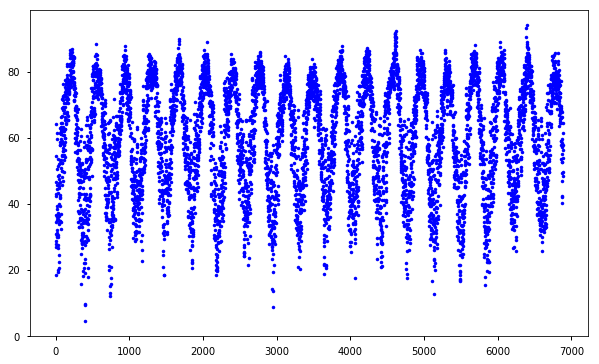

In [134]:
daily_temps.temp.plot(style='b.', figsize=(10,6), grid=False)

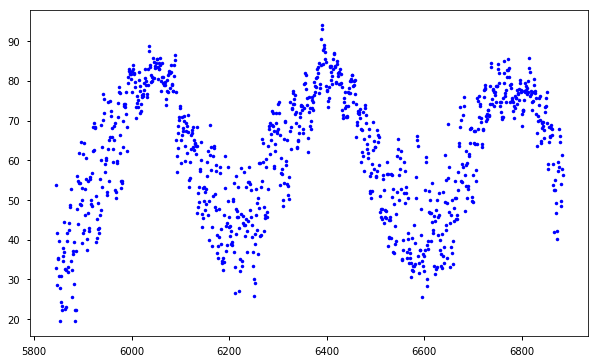

In [145]:
import pymc3 as pm
import theano
temps_2010 = daily_temps.temp[daily_temps.year>2010]
temps_2010.plot(style='b.', figsize=(10,6), grid=False)

x, y = temps_2010.reset_index().values.T
X = x.reshape(-1, 1)

with pm.Model() as rain_model:
    #ℓ = pm.Gamma("ℓ", alpha=2, beta=1)
    η = pm.HalfCauchy("η", beta=5)
    ℓ = pm.HalfCauchy("ℓ", 1)
    cov = pm.gp.cov.Cosine(1, ℓ)+η
    #cov = η**2 * pm.gp.cov.Matern52(1, ℓ)
    gp = pm.gp.MarginalSparse(cov_func=cov, approx="FITC")

#     ρ = pm.Gamma('ρ', 1, 1)
#     η = pm.Gamma('η', 1, 1)
    
#     M = pm.gp.mean.Linear(coeffs=(y/x).mean())
#     l = 0.2
#     tau = 2.0
#     K = tau * pm.gp.cov.Cosine(1, l)
#     σ = pm.HalfCauchy('σ', 1)
    
#     recruit_gp = pm.gp.Marginal(mean_func=M, cov_func=K)
#     recruit_gp.marginal_likelihood('recruits', X=X, y=y, noise=σ)

# with rain_model:
#     trace2 = pm.sample(2000)

# pm.traceplot(trace2, varnames=['ℓ', 'η']);

In [146]:
with rain_model:
    
    Xu = pm.gp.util.kmeans_inducing_points(20, X)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [18:26<00:00,  1.11s/it]/anaconda3/envs/bios8366/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:459: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)



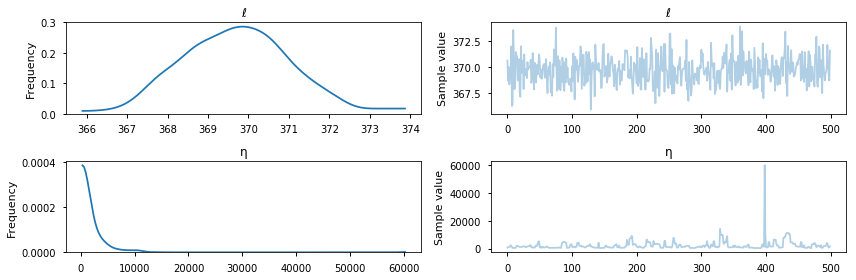

In [147]:
with rain_model:
    
    σ = pm.HalfCauchy("σ", beta=5)
    obs = gp.marginal_likelihood("obs", X=X, Xu=Xu, y=y, sigma=σ)
    
    trace = pm.sample(500, njobs=1, chains=1)
    
pm.traceplot(trace, varnames=['ℓ', 'η']);

In [148]:
X_new = np.linspace(5800, 7000, 200)[:,None]

# add the GP conditional to the model, given the new X values
with rain_model:
    f_pred = gp.conditional("f_pred", X_new)

# To use the MAP values, you can just replace the trace with a length-1 list with `mp`
with rain_model:
    pred_samples = pm.sample_ppc(trace, vars=[f_pred], samples=10)

100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


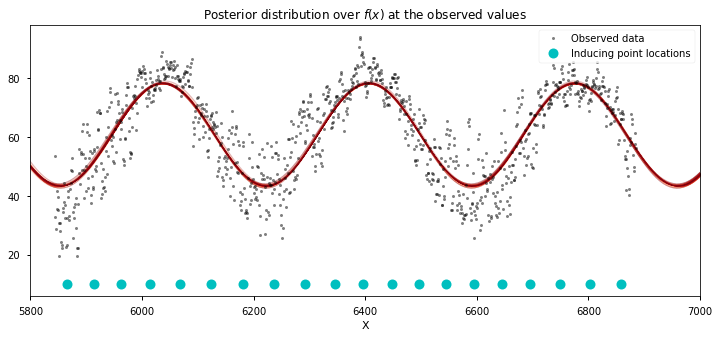

In [149]:

# plot the results
fig = plt.figure(figsize=(12,5)); ax = fig.gca()

# plot the samples from the gp posterior with samples and shading
from pymc3.gp.util import plot_gp_dist
plot_gp_dist(ax, pred_samples["f_pred"], X_new);

# plot the data and the true latent function
plt.plot(X, y, 'ok', ms=3, alpha=0.5, label="Observed data");
plt.plot(Xu, 10*np.ones(Xu.shape[0]), "co", ms=10, label="Inducing point locations")

# axis labels and title
plt.xlabel("X"); 
plt.xlim(5800,7000)
plt.title("Posterior distribution over $f(x)$ at the observed values"); plt.legend();

  > Hmm, I think I would've ran the sampler for longer. It doesn't look like one of the parameters converged well (\eta). Most likely this is due to the additivity in how you speocified the covariance function. Also, I'm surprised at how small the variance is for the posterior predictive draws. Coding looks right though. 
  
  > Q2: 25/25 

## Question 3

Fit a series of random-forest classifiers to the Wisconsin breast cancer dataset (`wisconsin_breast_cancer.csv`), to explore the sensitivity to the parameters `max_features`, the number of variables considered for splitting at each step, `max_depth`, the maximum depth of the tree, and `n_estimators`, the number of trees in the forest. Use apprpriate metrics of performance, and include plots against a suitably-chosen range of values for these parameters.

Dataset description: Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Ten real-valued features are computed for each cell nucleus:

- `radius` (mean of distances from center to points on the perimeter) 
- `texture` (standard deviation of gray-scale values) 
- `perimeter` 
- `area` 
- `smoothness` (local variation in radius lengths) 
- `compactness` (perimeter^2 / area - 1.0) 
- `concavity` (severity of concave portions of the contour) 
- `concave points` (number of concave portions of the contour) 
- `symmetry` 
- `fractal dimension` ("coastline approximation" - 1)

The outcome to be predicted is tumor type (M = malignant, B = benign).

In [62]:
bc_data = pd.read_csv("../data/wisconsin_breast_cancer.csv")


In [36]:
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
bc_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [63]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# save outcome
outcome = bc_data.pop('diagnosis').replace({'M': 1, 'B':0})

# only include attribute means (for now)
attributes = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 
              'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
bc_clean = bc_data.filter(items=attributes)

# udpate X and y
X = bc_clean
y = outcome

# set params to search
params = {
    'max_features': [1, 3, 5, 10],
    'max_depth': [1, 5, 7, 9,11],
    'n_estimators': [10, 50, 300, 500]
}

# run model
rf = RandomForestRegressor()
grid = GridSearchCV(rf, params)

grid.fit(*shuffle(X, y))
best = grid.best_estimator_

print("max features: {}, max depth: {}, n estimators: {}".format(best.max_features, 
                                                                 best.max_depth, 
                                                                 best.n_estimators))

max features: 5, max depth: 9, n estimators: 500


In [64]:
g=grid.cv_results_.get('params')
r=grid.cv_results_.get('split0_test_score')
bests=pd.DataFrame.from_dict(g)

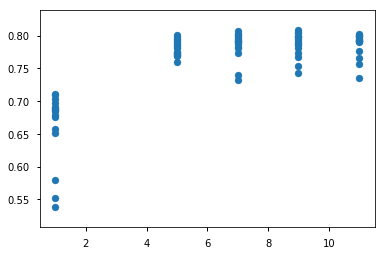

In [65]:
plt.scatter(bests.max_depth,r)

It seems like the classifier works best at a medium depth (around 7 or 9), which makes sense when we think about overfitting/underfitting. If there isn't enough depth in the model, the model can't make as many decisions to differentiate classes, so the model is not as good. However, at higher depth, we are splitting each leaf to be so small that it probably won't be very accurate/ will overfit.

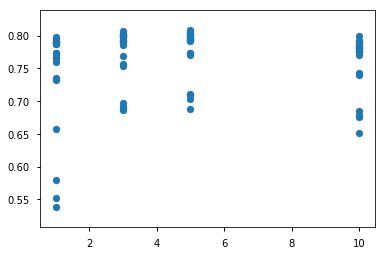

In [66]:
plt.scatter(bests.max_features,r)

The score doesn't seem to be as dependent on the maximum number of features, also it also seems to do best in a middle range at around 6 features. Same explanation as above.

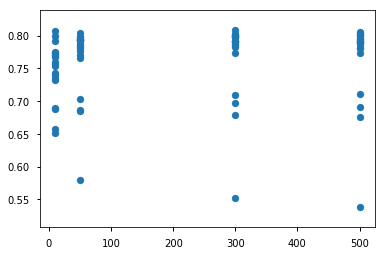

In [67]:
plt.scatter(bests.n_estimators,r)

This probably does have an effect, but I'm not seeing it here.

In [72]:
colors = '#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666'
est=rf
n_estimators = len(est.estimators_)

def deviance_plot(est, X_test, y_test, ax=None, label='', train_color=colors[0], 
                  test_color=colors[1], alpha=1.0):

    test_dev = np.array([est.loss_(y_test, pred) for pred in est.staged_predict(X_test)])

    if ax is None:
        fig = plt.figure(figsize=(8, 5))
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label, 
             linewidth=2, alpha=alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color, 
             label='Train %s' % label, linewidth=2, alpha=alpha)
    ax.set_ylabel('Error')
    ax.set_xlabel('n_estimators')
    ax.set_ylim((0, 2))
    
    return test_dev, ax

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

Not sure why I'm getting the error above (I looked in the documentation and RandomForestRegressor **does** have that attribute, but whatever), but this is how I would plot each variable like the plot below (from class notes) to evaluate the sensitivity to the parameters: n_estimators, max_depth, and max_features.

![Screenshot%202017-12-07%2016.42.23.png](attachment:Screenshot%202017-12-07%2016.42.23.png)

In [73]:
test_dev, ax = deviance_plot(est, X_test, y_test)
ax.legend(loc='upper right')

# add some annotations
ax.annotate('Lowest test error', xy=(test_dev.argmin() + 1, test_dev.min() + 0.02), xycoords='data',
            xytext=(150, 1.0), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )

ann = ax.annotate('', xy=(800, test_dev[799]),  xycoords='data',
                  xytext=(800, est.train_score_[799]), textcoords='data',
                  arrowprops=dict(arrowstyle="<->"))
ax.text(810, 0.25, 'train-test gap');

NameError: name 'deviance_plot' is not defined

> See solution for implementation:
    
> Q3: 15/25


## Question 4

Use a grid search to optimize the number of estimators and max_depth for a Gradient Boosted Decision tree using the Wisconsin breast cancer data. Plug this optimal ``max_depth`` into a *single* decision tree.  Does this single tree over-fit or under-fit the data? Repeat this for the Random Forest.  Construct a single decision tree using the ``max_depth`` which is optimal for the Random Forest.  Does this single tree over-fit or under-fit the data?

Using the Gradient Boosted Decision Tree, we can get out the best values for max_depth:

In [21]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# save outcome
outcome = bc_data.pop('diagnosis').replace({'M': 1, 'B':0})

# only include attribute means (for now)
attributes = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 
              'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
bc_clean = bc_data.filter(items=attributes)

# udpate X and y
X = bc_clean
y = outcome

# set params to search
params = {
    'max_features': [1, 3, 5, 10],
    'max_depth': [1, 5, 7, 9],
    'learning_rate': [.2,.6,.8,1]
}

# run model
rf = GradientBoostingRegressor()
grid = GridSearchCV(rf, params)

grid.fit(*shuffle(X, y))
best = grid.best_estimator_

print("max features: {}, max depth: {}, learning_rate: {}".format(best.max_features, 
                                                                 best.max_depth, 
                                                                 best.learning_rate))

max features: 3, max depth: 7, learning_rate: 0.2


The optimal max depth is 7, so we'll plug this into a single decision tree.

In [23]:
from sklearn import tree
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.4, random_state=0)

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_features="auto",
                                  max_depth=7,
                                  min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

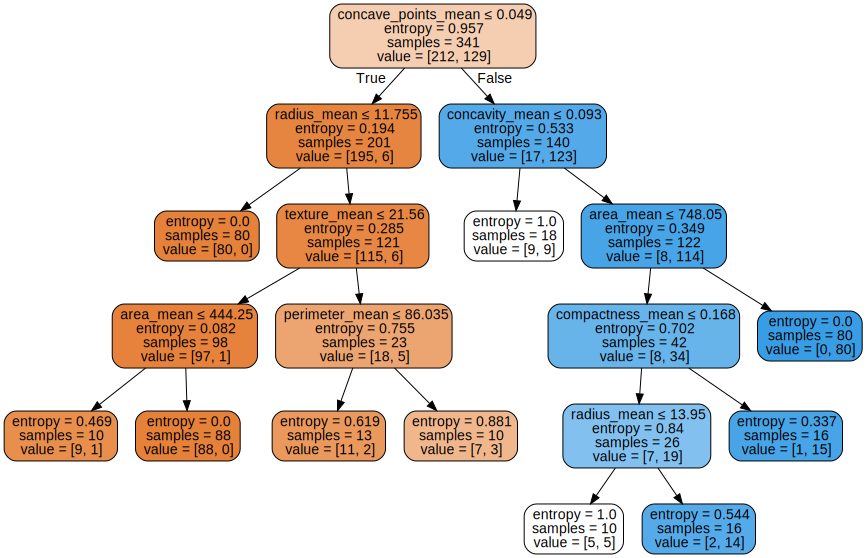

In [24]:
import graphviz
gv_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=attributes,  
                     filled=True, rounded=True,  
                     special_characters=True) 

graphviz.Source(gv_data)

In [29]:
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,0,1
actual,,
0,141,4
1,15,68


This tree probably overfits the data. It only gets 19 wrong out of 228, which is very high accuracy, but only because it is going pretty deep in the blue side of the tree; it can get really specific to the data it has, but may overfit to that data.

Next, we'll do the same thing for a Random Forest classifier.

In [26]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# only include attribute means (for now)
attributes = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 
              'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
bc_clean = bc_data.filter(items=attributes)

# udpate X and y
X = bc_clean
y = outcome

# set params to search
params = {
    'max_features': [1, 3, 5, 10],
    'max_depth': [1, 5, 7, 9],
    'n_estimators': [10, 50, 300, 500]
}

# run model
rf = RandomForestRegressor()
grid = GridSearchCV(rf, params)

grid.fit(*shuffle(X, y))
best = grid.best_estimator_

print("max features: {}, max depth: {}, n estimators: {}".format(best.max_features, 
                                                                 best.max_depth, 
                                                                 best.n_estimators))

max features: 3, max depth: 5, n estimators: 50


Using the Random Forest method, the max_depth is 5. When we plug this into our decision tree classifier, we get:

In [31]:
from sklearn import tree
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.4, random_state=0)

clf_rf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_features="auto",
                                  max_depth=5,
                                  min_samples_leaf=10)
clf_rf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

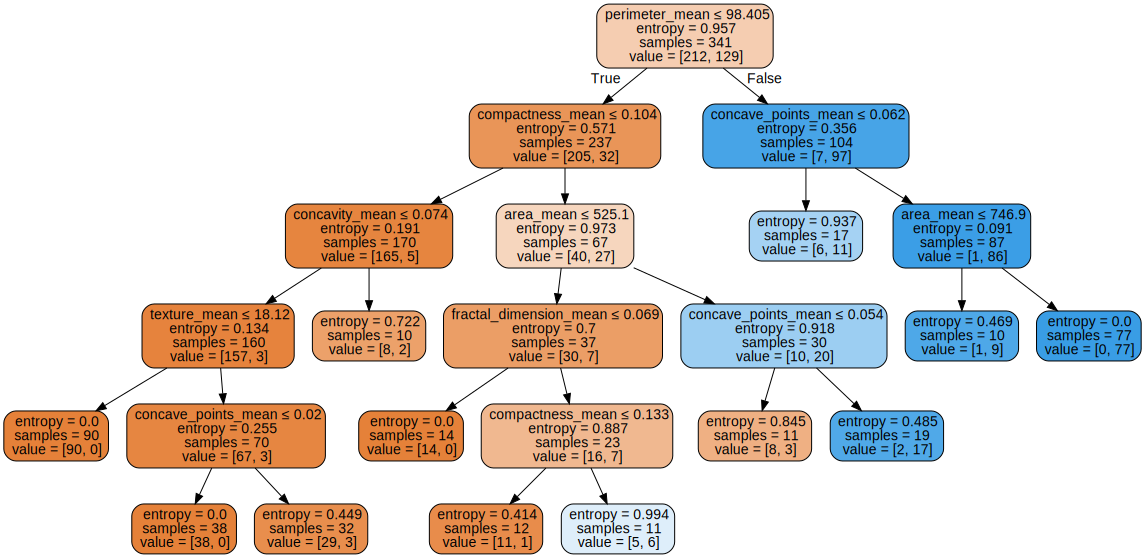

In [32]:
import graphviz
gv_data = tree.export_graphviz(clf_rf, out_file=None, 
                     feature_names=attributes,  
                     filled=True, rounded=True,  
                     special_characters=True) 

graphviz.Source(gv_data)

In [33]:
preds = clf_rf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,0,1
actual,,
0,131,14
1,10,73


This one probably also overfit the data. It only got 24 wrong, out of 228 data points. This one doesn't overfit as much as the first one, because the max depth is smaller, so it doesn't have as many parameters to fit. The greater max_depth is, the more closely the model is fitting to the data itself, which means that there's a higher chance of the model overfitting to that data.

> Nice work:
> Q4: 25/25
    
> HWK 3 Total: 88/100